<a href="https://colab.research.google.com/github/fahim12345c/computer-graphics-Lab/blob/main/Computer_graphics_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Draw a line with the Bresenham Line Drawing algorithm

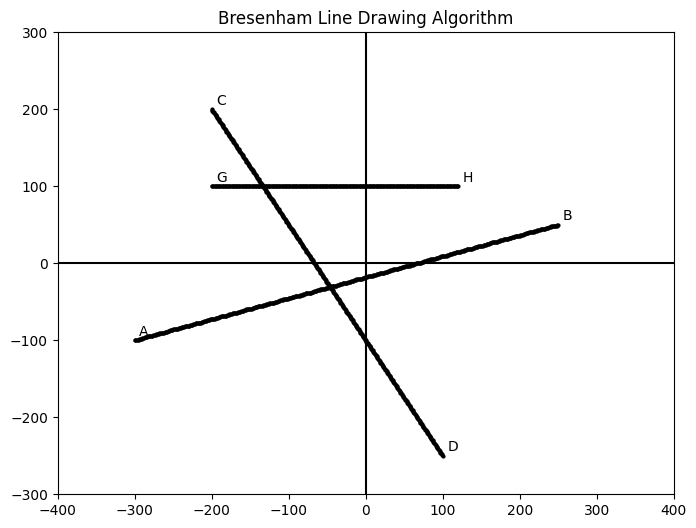

In [5]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def put_pixel(ax, x, y, color="black"):
    ax.plot(x, y, marker="o", color=color, markersize=2)

def label(ax, p: Point, text, color="black"):
    ax.text(p.x + 6, p.y + 6, text, fontsize=10, color=color)

def bresenham_line(ax, p1: Point, p2: Point, color="black"):
    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y

    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    dx = x2 - x1
    dy = abs(y2 - y1)
    sx = 1
    sy = 1 if y2 >= y1 else -1

    if dy <= dx:
        p = 2 * dy - dx
        x, y = x1, y1
        put_pixel(ax, x, y, color)
        for _ in range(dx):
            x += sx
            if p < 0:
                p += 2 * dy
            else:
                y += sy
                p += 2 * dy - 2 * dx
            put_pixel(ax, x, y, color)
    else:
        p = 2 * dx - dy
        x, y = x1, y1
        put_pixel(ax, x, y, color)
        for _ in range(dy):
            y += sy
            if p < 0:
                p += 2 * dx
            else:
                x += sx
                p += 2 * dx - 2 * dy
            put_pixel(ax, x, y, color)

if __name__ == "__main__":
    WIDTH, HEIGHT = 800, 600
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-WIDTH//2, WIDTH//2)
    ax.set_ylim(-HEIGHT//2, HEIGHT//2)
    ax.axhline(0, color="black")  # X-axis
    ax.axvline(0, color="black")  # Y-axis
    ax.set_aspect("equal")

    A = Point(-300, -100)
    B = Point(250, 50)
    C = Point(-200, 200)
    D = Point(100, -250)
    G = Point(-200, 100)
    H = Point(120, 100)

    for (p, q, col, name1, name2) in [
        (A, B, "black", "A", "B"),
        (C, D, "black", "C", "D"),
        (G, H, "black", "G", "H"),
    ]:
        label(ax, p, name1)
        label(ax, q, name2)
        bresenham_line(ax, p, q, color=col)

    ax.set_title("Bresenham Line Drawing Algorithm")
    plt.show()


# Experiment-2: Draw a circle with the Midpoint Circle Drawing algorithm

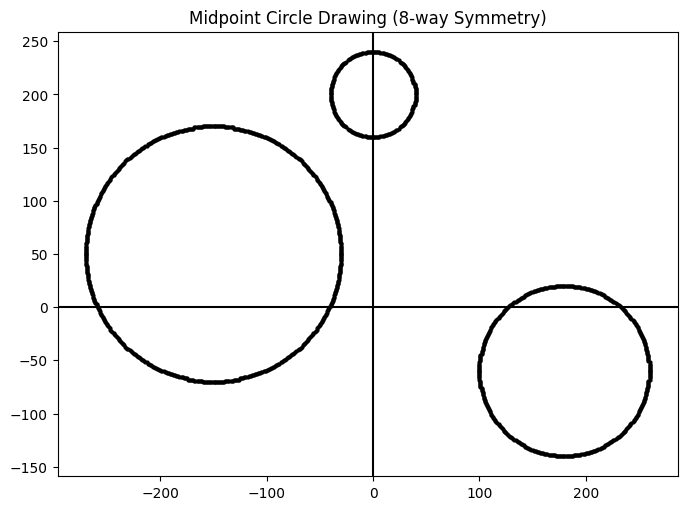

In [4]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def put_pixel(ax, x, y, color="lime"):
    ax.plot(x, y, marker="o", color=color, markersize=2)

def plot_octant_points(ax, xc, yc, x, y, color):
    put_pixel(ax, xc + x, yc + y, color)
    put_pixel(ax, xc + y, yc + x, color)
    put_pixel(ax, xc - y, yc + x, color)
    put_pixel(ax, xc - x, yc + y, color)
    put_pixel(ax, xc - x, yc - y, color)
    put_pixel(ax, xc - y, yc - x, color)
    put_pixel(ax, xc + y, yc - x, color)
    put_pixel(ax, xc + x, yc - y, color)

def midpoint_circle(ax, center: Point, r: int, color="lime"):
    x = 0
    y = r
    p = 1 - r

    plot_octant_points(ax, center.x, center.y, x, y, color)

    while x < y:
        x += 1
        if p < 0:
            p += 2 * x + 1
        else:
            y -= 1
            p += 2 * (x - y) + 1

        plot_octant_points(ax, center.x, center.y, x, y, color)

# Main drawing
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect("equal")
ax.axhline(0, color="black")  # X-axis
ax.axvline(0, color="black")  # Y-axis

# Circles
C = Point(-150, 50)
midpoint_circle(ax, C, 120, color="black")

C2 = Point(180, -60)
midpoint_circle(ax, C2, 80, color="black")

C3 = Point(0, 200)
midpoint_circle(ax, C3, 40, color="black")

ax.set_title("Midpoint Circle Drawing (8-way Symmetry)")
plt.show()


# Experiment-3: Implement the Cohen-Sutherland Line Clipping algorithm

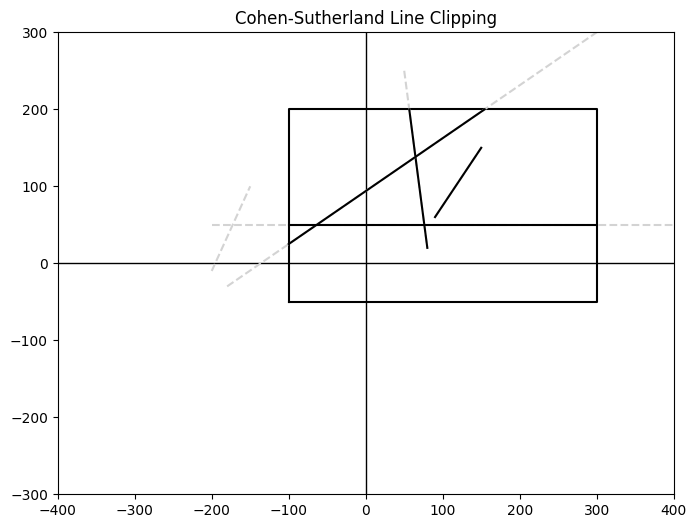

In [6]:
import matplotlib.pyplot as plt

# Clipping window boundaries
x_left, x_right = -100, 300
y_bottom, y_top = -50, 200

# Region codes
LEFT, RIGHT, BOTTOM, TOP = 1, 2, 4, 8

def region_code(x, y):
    code = 0
    if x < x_left:
        code |= LEFT
    elif x > x_right:
        code |= RIGHT
    if y < y_bottom:
        code |= BOTTOM
    elif y > y_top:
        code |= TOP
    return code

def cohen_sutherland(x1, y1, x2, y2):
    code1 = region_code(x1, y1)
    code2 = region_code(x2, y2)

    while True:
        if not (code1 | code2):  # completely inside
            return [(x1, y1), (x2, y2)]
        elif code1 & code2:  # completely outside
            return None
        else:  # partially inside
            if code1:
                code_out = code1
            else:
                code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (y_top - y1) / (y2 - y1)
                y = y_top
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (y_bottom - y1) / (y2 - y1)
                y = y_bottom
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (x_right - x1) / (x2 - x1)
                x = x_right
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (x_left - x1) / (x2 - x1)
                x = x_left

            if code_out == code1:
                x1, y1 = x, y
                code1 = region_code(x1, y1)
            else:
                x2, y2 = x, y
                code2 = region_code(x2, y2)

# Setup plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-WIDTH//2, WIDTH//2)
ax.set_ylim(-HEIGHT//2, HEIGHT//2)

# Draw axes
ax.axhline(0, color="black", linewidth=1)
ax.axvline(0, color="black", linewidth=1)

# Draw clipping window
rect_x = [x_left, x_right, x_right, x_left, x_left]
rect_y = [y_bottom, y_bottom, y_top, y_top, y_bottom]
ax.plot(rect_x, rect_y, color="black")

# Test lines
lines = [
    (90, 60, 150, 150),
    (50, 250, 80, 20),
    (-180, -30, 300, 300),
    (-200, -10, -150, 100),
    (-200, 50, 400, 50)
]

for x1, y1, x2, y2 in lines:
    # draw original line (light gray)
    ax.plot([x1, x2], [y1, y2], color="lightgray", linestyle="--")

    # draw clipped line (black)
    clipped = cohen_sutherland(x1, y1, x2, y2)
    if clipped:
        (cx1, cy1), (cx2, cy2) = clipped
        ax.plot([cx1, cx2], [cy1, cy2], color="black")

ax.set_title("Cohen-Sutherland Line Clipping")
ax.set_aspect("equal")
plt.show()


# Experiment-4: Implement the Sutherland-Hodgman Polygon Clipping algorithm

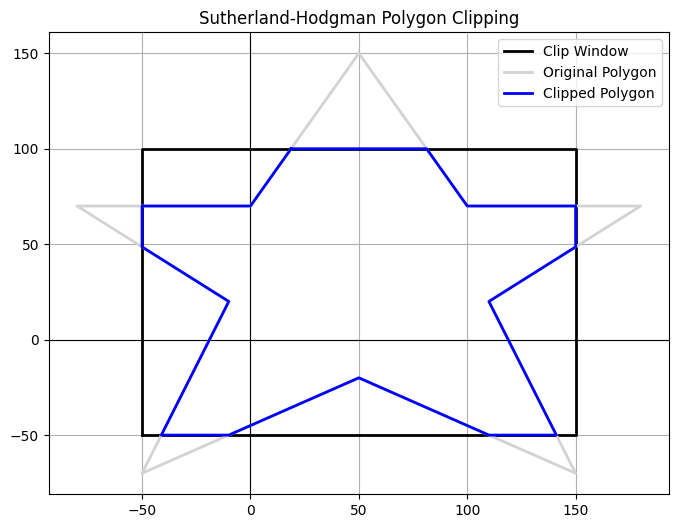

In [8]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

wMin = Point(-50, -50)
wMax = Point(150, 100)

LEFT, RIGHT, BOTTOM, TOP = 0, 1, 2, 3

def inside(p, edge):
    if edge == LEFT:
        return p.x >= wMin.x
    elif edge == RIGHT:
        return p.x <= wMax.x
    elif edge == BOTTOM:
        return p.y >= wMin.y
    elif edge == TOP:
        return p.y <= wMax.y

def intersect(p1, p2, edge):
    if p1.x != p2.x:
        m = (p2.y - p1.y) / (p2.x - p1.x)
    else:
        m = float('inf')

    if edge == LEFT:
        x = wMin.x
        y = p1.y + (wMin.x - p1.x) * m
    elif edge == RIGHT:
        x = wMax.x
        y = p1.y + (wMax.x - p1.x) * m
    elif edge == BOTTOM:
        y = wMin.y
        x = p1.x + (wMin.y - p1.y) / m if m != 0 else p1.x
    elif edge == TOP:
        y = wMax.y
        x = p1.x + (wMax.y - p1.y) / m if m != 0 else p1.x

    return Point(x, y)

def clip_polygon(points, edge):
    clipped = []
    for i in range(len(points)):
        curr = points[i]
        prev = points[i - 1]
        curr_in = inside(curr, edge)
        prev_in = inside(prev, edge)

        if prev_in and curr_in:
            clipped.append(curr)
        elif not prev_in and curr_in:
            clipped.append(intersect(prev, curr, edge))
            clipped.append(curr)
        elif prev_in and not curr_in:
            clipped.append(intersect(prev, curr, edge))
    return clipped

def plot_polygon(points, color, label=None):
    if not points:
        return
    xs = [p.x for p in points] + [points[0].x]
    ys = [p.y for p in points] + [points[0].y]
    plt.plot(xs, ys, color=color, linewidth=2, label=label)

# Star polygon
star_points = [
    Point(  50, 150),
    Point( 100,  70),
    Point( 180,  70),
    Point( 110,  20),
    Point( 150, -70),
    Point(  50, -20),
    Point( -50, -70),
    Point( -10,  20),
    Point( -80,  70),
    Point(   0,  70)
]

# Start with original polygon
clipped = star_points
for edge in [LEFT, RIGHT, BOTTOM, TOP]:
    clipped = clip_polygon(clipped, edge)

# Draw
plt.figure(figsize=(8, 6))

# Draw axes
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)

# Draw clipping window
plt.plot([wMin.x, wMax.x, wMax.x, wMin.x, wMin.x],
         [wMin.y, wMin.y, wMax.y, wMax.y, wMin.y],
         color="black", linewidth=2, label="Clip Window")

# Draw original polygon (gray)
plot_polygon(star_points, "lightgray", "Original Polygon")

# Draw clipped polygon (black)
plot_polygon(clipped, "blue", "Clipped Polygon")

plt.legend()
plt.title("Sutherland-Hodgman Polygon Clipping")
plt.grid(True)
plt.show()


# Experiment-5: Create the Bezier Curve

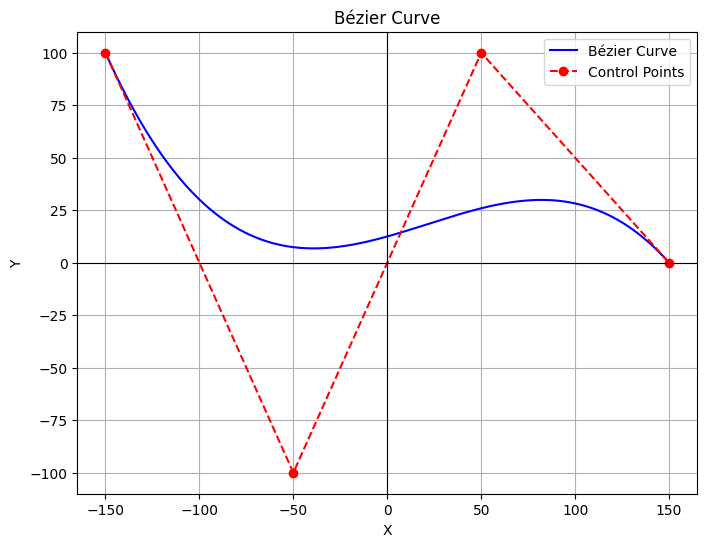

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from math import comb  # for nCr

def bezier_function(k, n, u):
    return comb(n, k) * (u ** k) * ((1 - u) ** (n - k))

def bezier_curve(points, num=1000):
    n = len(points) - 1
    curve = []
    u_values = np.linspace(0, 1, num)
    for u in u_values:
        x = sum(points[k][0] * bezier_function(k, n, u) for k in range(n + 1))
        y = sum(points[k][1] * bezier_function(k, n, u) for k in range(n + 1))
        curve.append((x, y))
    return curve

# Control points
control_points = [
    (-150, 100),
    (-50, -100),
    (50, 100),
    (150, 0)
]

# Generate Bézier curve
curve = bezier_curve(control_points)

# Separate x and y coordinates
curve_x, curve_y = zip(*curve)
ctrl_x, ctrl_y = zip(*control_points)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(curve_x, curve_y, 'b-', label="Bézier Curve")
plt.plot(ctrl_x, ctrl_y, 'ro--', label="Control Points")  # red dots + dashed lines
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Bézier Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


# 6: Simulate two-dimensional geometric Translation

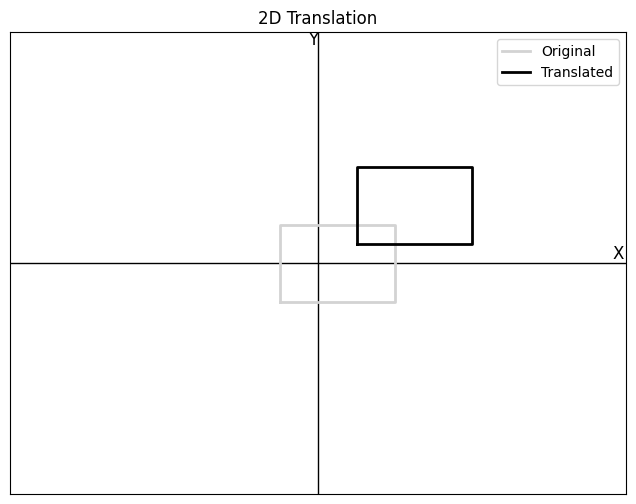

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def draw_polygon(ax, poly, color, label=None):
    x, y = zip(*poly)
    x = list(x) + [x[0]]
    y = list(y) + [y[0]]
    ax.plot(x, y, color=color, linewidth=2, label=label)

def draw_axes(ax, width, height):
    ax.axhline(y=0, color='black', linewidth=1, xmin=-width/2/400, xmax=width/2/400)
    ax.axvline(x=0, color='black', linewidth=1, ymin=-height/2/300, ymax=height/2/300)
    ax.text(width/2-10, 0, 'X', ha='center', va='bottom', fontsize=12)
    ax.text(0, height/2-10, 'Y', ha='right', va='center', fontsize=12)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal')
ax.set_xlim(-400, 400)
ax.set_ylim(-300, 300)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Draw axes
draw_axes(ax, 800, 600)

# Original and translated coordinates
original_coordinates = np.array([
    [-50, -50],
    [100, -50],
    [100, 50],
    [-50, 50]
])
tx, ty = 100, 75
translated_coordinates = original_coordinates + [tx, ty]

# Draw polygons
draw_polygon(ax, original_coordinates, 'lightgray', 'Original')
draw_polygon(ax, translated_coordinates, 'black', 'Translated')

# Add legend
ax.legend()

# Show plot
plt.title("2D Translation")
plt.show()

# 7: Simulate two-dimensional geometric Rotation

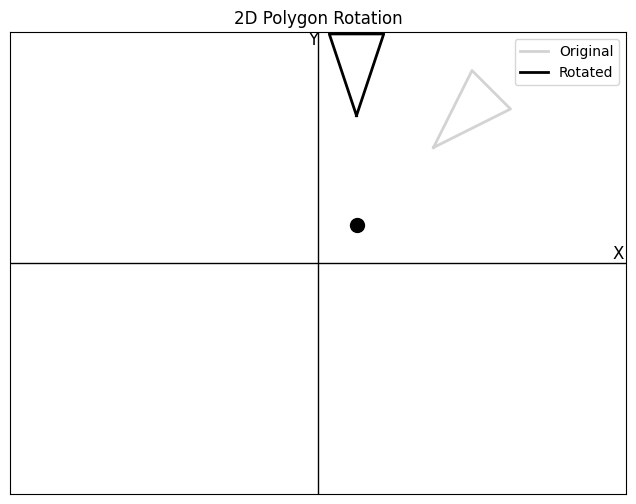

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math

def to_radian(degree):
    return (degree * math.pi) / 180

def draw_polygon(ax, poly, color, label=None):
    x, y = zip(*poly)
    x = list(x) + [x[0]]
    y = list(y) + [y[0]]
    ax.plot(x, y, color=color, linewidth=2, label=label)

def draw_axes(ax, width, height):
    ax.axhline(y=0, color='black', linewidth=1, xmin=-width/2/400, xmax=width/2/400)
    ax.axvline(x=0, color='black', linewidth=1, ymin=-height/2/300, ymax=height/2/300)
    ax.text(width/2-10, 0, 'X', ha='center', va='bottom', fontsize=12)
    ax.text(0, height/2-10, 'Y', ha='right', va='center', fontsize=12)

def mark_pivot_point(ax, pivot_point, color):
    ax.plot(pivot_point[0], pivot_point[1], marker='o', color=color, markersize=10)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal')
ax.set_xlim(-400, 400)
ax.set_ylim(-300, 300)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Draw axes
draw_axes(ax, 800, 600)

# Original and rotated coordinates
original_coordinates = np.array([
    [150, 150],
    [250, 200],
    [200, 250]
])
angle = 45
rx, ry = 50, 50

rotated_coordinates = []
for point in original_coordinates:
    x, y = point

    x_shifted = x - rx
    y_shifted = y - ry

    rad_angle = to_radian(angle)
    cos_angle = math.cos(rad_angle)
    sin_angle = math.sin(rad_angle)

    x_rotated = x_shifted * cos_angle - y_shifted * sin_angle
    y_rotated = x_shifted * sin_angle + y_shifted * cos_angle

    final_x = x_rotated + rx
    final_y = y_rotated + ry

    rotated_coordinates.append([final_x, final_y])
rotated_coordinates = np.array(rotated_coordinates)

# Draw pivot point
mark_pivot_point(ax, [rx, ry], 'black')

# Draw polygons
draw_polygon(ax, original_coordinates, 'lightgray', 'Original')
draw_polygon(ax, rotated_coordinates, 'black', 'Rotated')

# Add legend
ax.legend()

# Show plot
plt.title("2D Polygon Rotation")
plt.show()

# 8: Simulate two-dimensional geometric Scaling

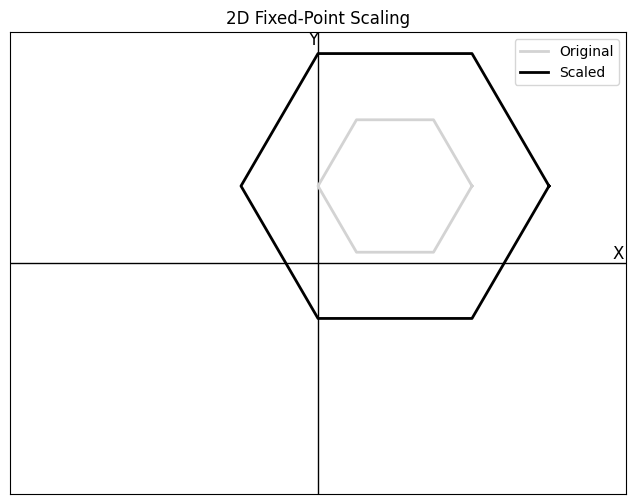

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def draw_polygon(ax, poly, color, label=None):
    x, y = zip(*poly)
    x = list(x) + [x[0]]
    y = list(y) + [y[0]]
    ax.plot(x, y, color=color, linewidth=2, label=label)

def draw_axes(ax, width, height):
    ax.axhline(y=0, color='black', linewidth=1, xmin=-width/2/400, xmax=width/2/400)
    ax.axvline(x=0, color='black', linewidth=1, ymin=-height/2/300, ymax=height/2/300)
    ax.text(width/2-10, 0, 'X', ha='center', va='bottom', fontsize=12)
    ax.text(0, height/2-10, 'Y', ha='right', va='center', fontsize=12)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal')
ax.set_xlim(-400, 400)
ax.set_ylim(-300, 300)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Draw axes
draw_axes(ax, 800, 600)

# Original and scaled coordinates
original_coordinates = np.array([
    [200, 100],
    [150, 186],
    [50, 186],
    [0, 100],
    [50, 14],
    [150, 14]
])

# Calculate the centroid (fixed point)
n = len(original_coordinates)
xf = np.mean(original_coordinates[:, 0])
yf = np.mean(original_coordinates[:, 1])

sx, sy = 2, 2
scaled_coordinates = []

for x, y in original_coordinates:
    new_x = xf + (x - xf) * sx
    new_y = yf + (y - yf) * sy
    scaled_coordinates.append([new_x, new_y])
scaled_coordinates = np.array(scaled_coordinates)

# Draw polygons
draw_polygon(ax, original_coordinates, 'lightgray', 'Original')
draw_polygon(ax, scaled_coordinates, 'black', 'Scaled')

# Add legend
ax.legend()

# Show plot
plt.title("2D Fixed-Point Scaling")
plt.show()

# 9: Draw the Snowflake Pattern with Fractal Geometry

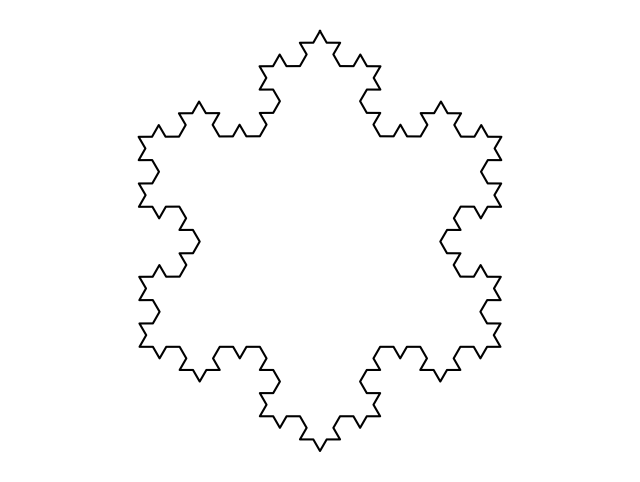

In [16]:
import matplotlib.pyplot as plt
import math

def koch_curve(p1, p5, it):
    """Recursively compute points of Koch curve from p1 to p5."""
    if it == 0:
        return [p1, p5]

    dx = (p5[0] - p1[0]) / 3
    dy = (p5[1] - p1[1]) / 3

    x1 = p1[0] + dx
    y1 = p1[1] + dy

    x3 = p1[0] + 2 * dx
    y3 = p1[1] + 2 * dy

    # Calculate peak of the triangle
    x2 = x1 + (x3 - x1) / 2 + math.sqrt(3) * (y3 - y1) / 2
    y2 = y1 + (y3 - y1) / 2 - math.sqrt(3) * (x3 - x1) / 2

    # Recursively compute points for each segment
    part1 = koch_curve(p1, (x1, y1), it - 1)[:-1]
    part2 = koch_curve((x1, y1), (x2, y2), it - 1)[:-1]
    part3 = koch_curve((x2, y2), (x3, y3), it - 1)[:-1]
    part4 = koch_curve((x3, y3), p5, it - 1)

    return part1 + part2 + part3 + part4

# Define triangle points
p0 = (0, 250)
p1 = (-200, -100)
p2 = (200, -100)
iterations = 3

# Generate Koch snowflake points for each side
points1 = koch_curve(p0, p1, iterations)
points2 = koch_curve(p1, p2, iterations)
points3 = koch_curve(p2, p0, iterations)

# Combine all points
snowflake = points1 + points2[1:] + points3[1:]

# Split x and y coordinates for plotting
x, y = zip(*snowflake)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='black')
plt.axis('equal')
plt.axis('off')
plt.show()


In [17]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [19]:
!git commit -m"add update computer graphics"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@58f55ba0c48f.(none)')


In [24]:
!git branch